#Import Libraries

In [ ]:
!pip install -U scikit-learn==1.7.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import sklearn
print(sklearn.__version__)


1.7.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
df=pd.read_csv('/content/customer_churn_ml_ready.csv')

In [ ]:
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                    0                  0                  0   
1                    0  

In [ ]:
df=df.drop('customerID',axis=1)

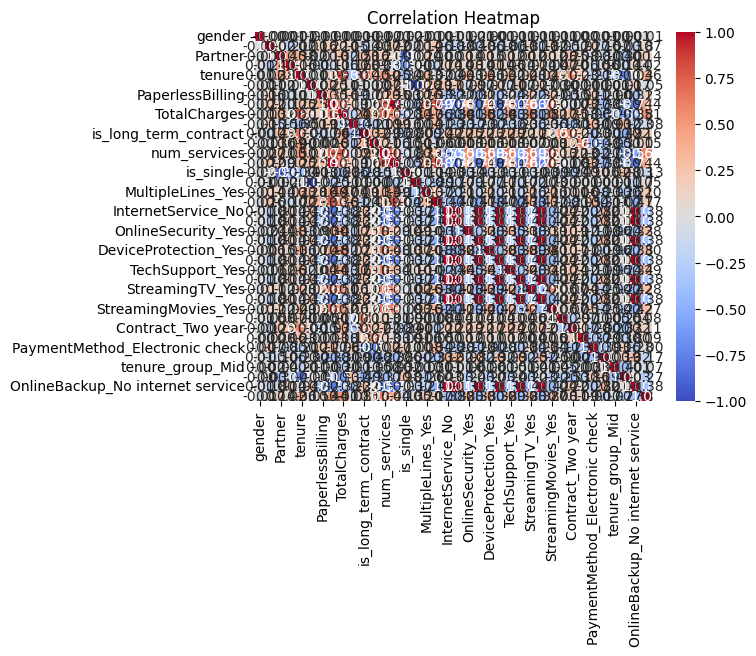

In [ ]:
#Correlation Heatmap
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
target='Churn'
corr=df.corr()[target]
important=corr[abs(corr)>=0.1]
print(important)

SeniorCitizen                            0.150889
Partner                                 -0.150448
Dependents                              -0.164221
tenure                                  -0.352229
PaperlessBilling                         0.191825
MonthlyCharges                           0.193356
TotalCharges                            -0.198324
Churn                                    1.000000
is_long_term_contract                   -0.405103
is_auto_payment                         -0.209902
avg_monthly_spend                        0.193301
is_single                                0.162835
InternetService_Fiber optic              0.308020
InternetService_No                      -0.227890
OnlineSecurity_No internet service      -0.227890
OnlineSecurity_Yes                      -0.171226
DeviceProtection_No internet service    -0.227890
TechSupport_No internet service         -0.227890
TechSupport_Yes                         -0.164674
StreamingTV_No internet service         -0.227890


In [ ]:
#drop unnecessary columns
drop=['OnlineSecurity_No internet service','TechSupport_No internet service','StreamingTV_No internet service']
df=df.drop(drop,axis=1)

In [ ]:
##Select Feature & Target
x=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
#Split Train & Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Model Comparision
Models={
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassif':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier()

}
Result={}
for name, model in Models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  Result[name]=accuracy
  print(f"{name} Accuracy : {accuracy}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy : 0.8183108587650816
DecisionTreeClassifier Accuracy : 0.7381121362668559
RandomForestClassifier Accuracy : 0.7970191625266146
GradientBoostingClassif Accuracy : 0.8097941802696949
XGBClassifier Accuracy : 0.7785663591199432


#PipeLine

In [ ]:
#preprocessing
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'avg_monthly_spend', 'num_services']

preprocessing = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('smote', SMOTE(random_state=42)),
    ('Models', GradientBoostingClassifier(random_state=42))
])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.802
Confusion Matrix:
 [[860 176]
 [103 270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1036
           1       0.61      0.72      0.66       373

    accuracy                           0.80      1409
   macro avg       0.75      0.78      0.76      1409
weighted avg       0.82      0.80      0.81      1409



#Hyperparameter Tuning

In [ ]:
param_grid={
    'Models__n_estimators':[50,100,150],
    'Models__learning_rate':[0.01,0.05,0.1],
    'Models__max_depth':[3,5,7]

}
grid=GridSearchCV(pipeline,param_grid,cv=5)
grid.fit(x_train,y_train)
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_}")

Best Parameters: {'Models__learning_rate': 0.1, 'Models__max_depth': 3, 'Models__n_estimators': 150}
Best Score: 0.7862964754980686


Accuracy: 0.809
Confusion Matrix:
 [[877 159]
 [110 263]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1036
           1       0.62      0.71      0.66       373

    accuracy                           0.81      1409
   macro avg       0.76      0.78      0.76      1409
weighted avg       0.82      0.81      0.81      1409



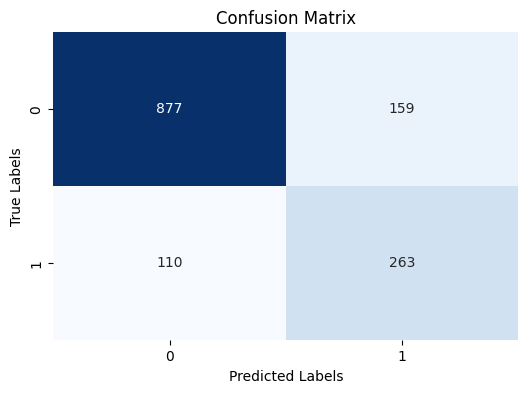

In [ ]:
#Train Best Model
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel('True Labels')
plt.show()

#Cross Validation Score

In [ ]:
scores=cross_val_score(best_model,x,y,cv=5,scoring='accuracy')
print(f"Cross Validation Score : {scores}")
print(f"Mean CV Score: {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")

Cross Validation Score : [0.79488999 0.79418027 0.77146913 0.79900568 0.78693182]
Mean CV Score: 0.7892953779276082
Standard Deviation: 0.009724335671999509


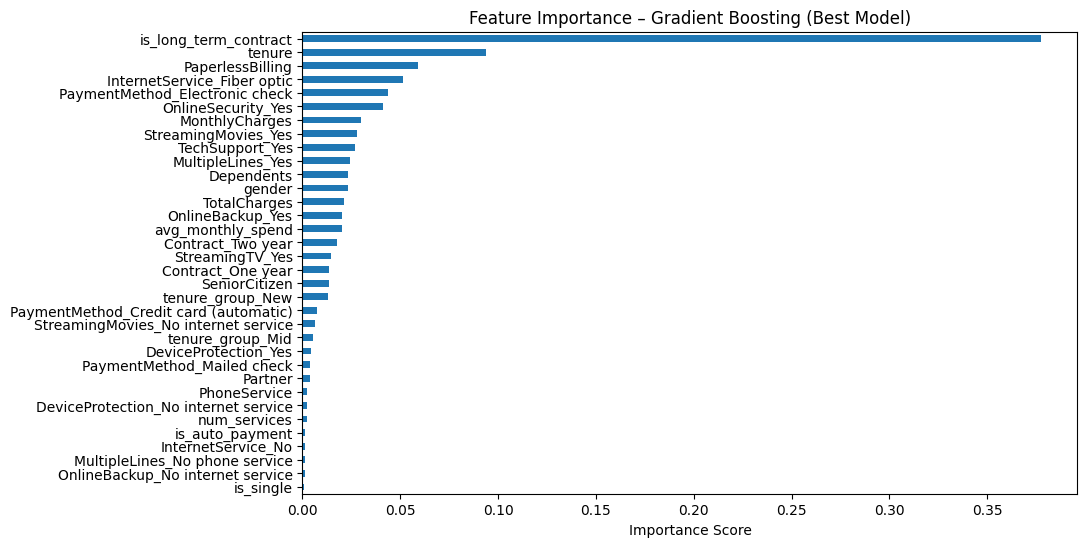

In [ ]:
#Important Features
gb_model = best_model.named_steps['Models']
importance = gb_model.feature_importances_

preprocessor = best_model.named_steps['preprocessing']
feature_names = numeric_features + [
    col for col in x_train.columns if col not in numeric_features
]

feat_imp = pd.Series(importance, index=feature_names)\
            .sort_values(ascending=True)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='barh')
plt.title("Feature Importance – Gradient Boosting (Best Model)")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
joblib.dump(best_model,'churn_model.pkl')
print("Classification model saved: churn_model.pkl")



Classification model saved: churn_model.pkl


#Regression

In [ ]:
#Select Feature & Target
x_reg=df.drop(['Churn','MonthlyCharges'],axis=1)
y_reg=df['MonthlyCharges']

In [ ]:
#Split Train & Test
X_train,X_test,Y_train,Y_test=train_test_split(x_reg,y_reg,test_size=0.2,random_state=42)

In [ ]:
#Model Comparision
models={
    "LinearRegressior":LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}
Results={}
for name,model in models.items():
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  mse=mean_squared_error(Y_test,Y_pred)
  mae=mean_absolute_error(Y_test,Y_pred)
  r2=r2_score(Y_test,Y_pred)
  Results[name]=[mse,mae,r2]
  print(f"{name} MSE: {mse}")
  print(f"{name} MAE: {mae}")
  print(f"{name} R2 Score: {r2}")










LinearRegressior MSE: 0.9946175942814278
LinearRegressior MAE: 0.7477245184177477
LinearRegressior R2 Score: 0.9989014297850455
RandomForestRegressor MSE: 2.959597850642691
RandomForestRegressor MAE: 1.0807728885734558
RandomForestRegressor R2 Score: 0.9967310792955475
GradientBoostingRegressor MSE: 3.7496188847942613
GradientBoostingRegressor MAE: 1.2886635251325251
GradientBoostingRegressor R2 Score: 0.9958584890836948


#Pipeline

In [ ]:
#Preprocessing
numeric_features = ['tenure', 'TotalCharges', 'avg_monthly_spend', 'num_services']
preprocessing=ColumnTransformer(transformers=[
     ('num',StandardScaler(),numeric_features)
     ],remainder='passthrough')
regression_pipeline=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('Models',LinearRegression())
])
regression_pipeline.fit(X_train,Y_train)
Y_pred=regression_pipeline.predict(X_test)
print(f"R2 Score: {r2_score(Y_test,Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test,Y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test,Y_pred)}")



R2 Score: 0.9989014297850455
Mean Squared Error: 0.9946175942814364
Mean Absolute Error: 0.7477245184177544


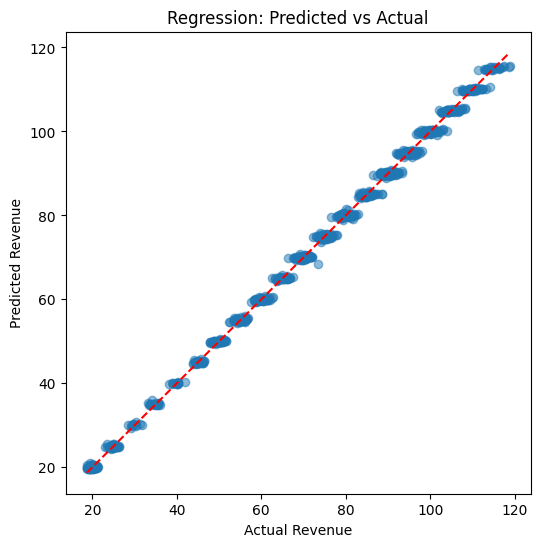

In [ ]:
#Scatterplot
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Regression: Predicted vs Actual")
plt.show()


In [ ]:
joblib.dump(regression_pipeline, 'revenue_model.pkl')
print("Regression model saved: revenue_model.pkl")


Regression model saved: revenue_model.pkl


#Clustering

In [ ]:
cluster_feature=['tenure', 'MonthlyCharges', 'TotalCharges', 'avg_monthly_spend',
                    'num_services', 'is_long_term_contract', 'is_auto_payment', 'is_single']
x_cluster=df[cluster_feature]

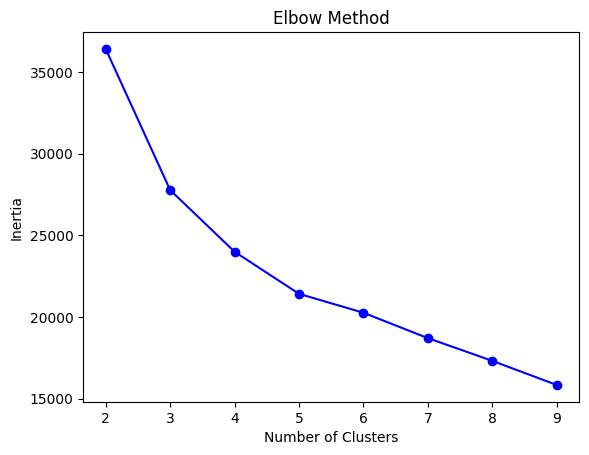

In [ ]:
#scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_cluster)
joblib.dump(scaler, 'scaler_kmeans.pkl')
inertia=[]
K=range(2,10)
for k in K:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)
plt.plot(K,inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.title('Elbow Method')
plt.show()


In [ ]:
best_k=4
kmeans=KMeans(n_clusters=best_k,random_state=42)
df['clusters']=kmeans.fit_predict(x_scaled)
print(df['clusters'].value_counts())

clusters
2    2313
3    1953
1    1446
0    1331
Name: count, dtype: int64


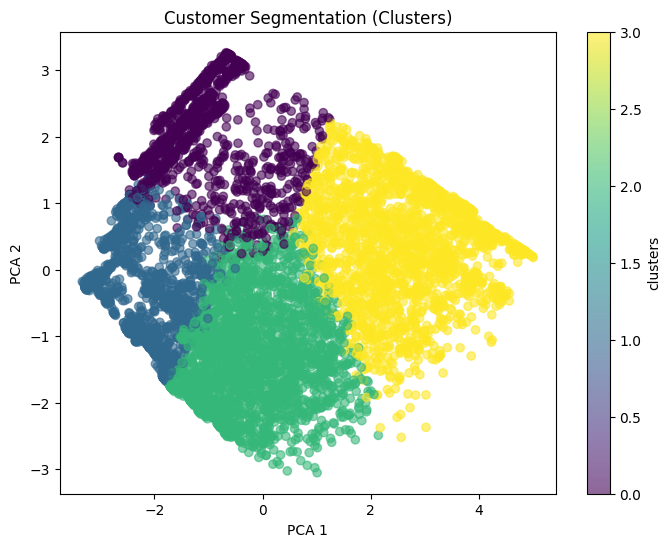

In [ ]:
#pca
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['clusters'], cmap='viridis', alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segmentation (Clusters)")
plt.colorbar(label='clusters')
plt.show()

In [ ]:
joblib.dump(kmeans, 'customer_segmentation_kmeans.pkl')
joblib.dump(pca, "pca_model.pkl")
print("Clustering models saved: customer_segmentation_kmeans.pkl & pca_model.pkl")



Clustering models saved: customer_segmentation_kmeans.pkl & pca_model.pkl


In [ ]:
clf=joblib.load('churn_model.pkl')
clf_pred=clf.predict(x_test[:5])
print(f"Classification Prediction: {clf_pred}")

Classification Prediction: [1 0 0 1 0]


In [ ]:
reg=joblib.load('revenue_model.pkl')
reg_pred=reg.predict(x_test[:5])
print(f"Classification Prediction: {reg_pred}")

Classification Prediction: [25.04614896 24.88528154 19.91720458 75.08090243 49.82934517]


#Shap

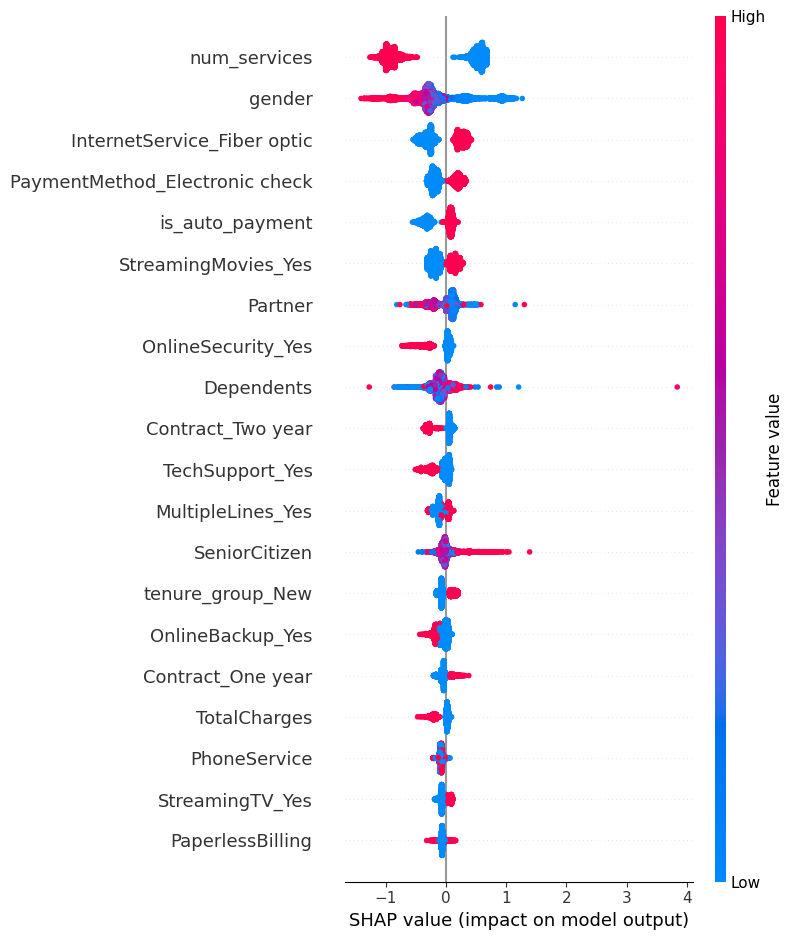

In [ ]:
import shap

explainer = shap.TreeExplainer(best_model.named_steps['Models'])
x_train_transformed = best_model.named_steps['preprocessing'].transform(x_train)

shap_values = explainer.shap_values(x_train_transformed)

all_features = x_train.columns
shap.summary_plot(shap_values, x_train_transformed, feature_names=all_features)


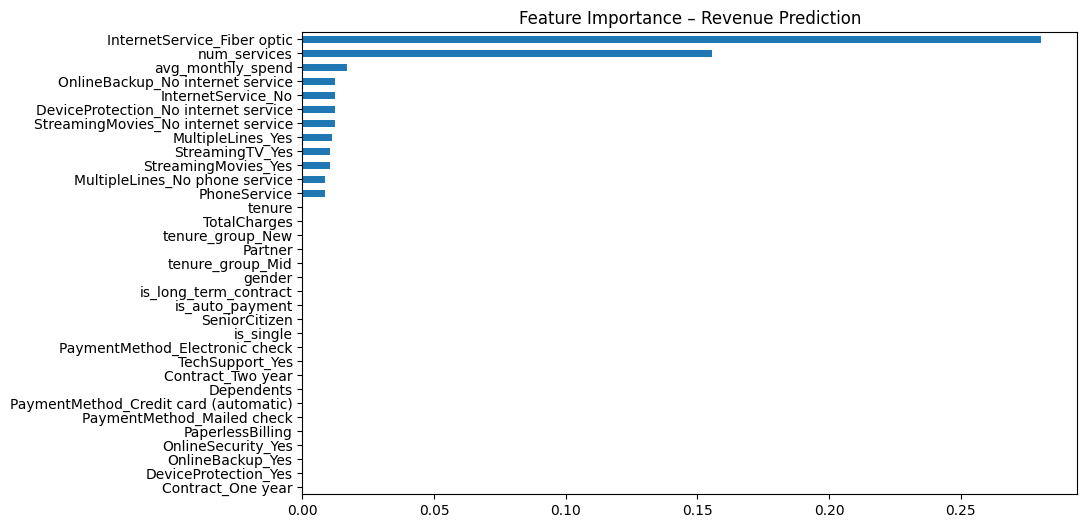

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(regression_pipeline, X_test, Y_test, n_repeats=10, random_state=42)
importance = pd.Series(result.importances_mean, index=X_test.columns).sort_values(ascending=True)

# Bar plot
plt.figure(figsize=(10,6))
importance.plot(kind='barh')
plt.title("Feature Importance – Revenue Prediction")
plt.show()


#Recommendation

In [ ]:
#recommendation
def recommend_action(row):
    if row['Churn'] == 1:
        if row['MonthlyCharges'] > 70:
            return 'Offer Discount'
        else:
            return 'Loyalty Reward'
    elif row['avg_monthly_spend'] > 100:
        return 'Upsell Product'
    else:
        return 'No Action'

df['Recommendation'] = df.apply(recommend_action, axis=1)
df[['Churn', 'MonthlyCharges', 'avg_monthly_spend', 'Recommendation']].head(10)


,Churn,MonthlyCharges,avg_monthly_spend,Recommendation
0,0,29.85,29.850000,No Action
1,0,56.95,55.573529,No Action
2,1,53.85,54.075000,Loyalty Reward
3,0,42.30,40.905556,No Action
4,1,70.70,75.825000,Offer Discount
5,1,99.65,102.562500,Offer Discount
6,0,89.10,88.609091,No Action
7,0,29.75,30.190000,No Action
8,1,104.80,108.787500,Offer Discount
9,0,56.15,56.257258,No Action
